In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
data = pd.read_csv('DS_Jobs.csv')

In [3]:
data.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Type of ownership,Industry,...,company_age,python,excel,hadoop,spark,aws,tableau,big_data,job_simp,seniority
0,Sr Data Scientist,137-171,Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst,"New York, NY","New York, NY",1001 to 5000 employees,Nonprofit Organization,Insurance Carriers,...,27,0,0,0,0,1,0,0,data scientist,senior
1,Data Scientist,137-171,"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,ManTech,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,Company - Public,Research & Development,...,52,0,0,1,0,0,0,1,data scientist,na
2,Data Scientist,137-171,Overview\n\n\nAnalysis Group is one of the lar...,3.8,Analysis Group,"Boston, MA","Boston, MA",1001 to 5000 employees,Private Practice / Firm,Consulting,...,39,1,1,0,0,1,0,0,data scientist,na
3,Data Scientist,137-171,JOB DESCRIPTION:\n\nDo you have a passion for ...,3.5,INFICON,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,Company - Public,Electrical & Electronic Manufacturing,...,20,1,1,0,0,1,0,0,data scientist,na
4,Data Scientist,137-171,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions,"New York, NY","New York, NY",51 to 200 employees,Company - Private,Advertising & Marketing,...,22,1,1,0,0,0,0,0,data scientist,na


In [4]:
data.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Type of ownership',
       'Industry', 'Sector', 'Revenue', 'min_salary', 'max_salary',
       'avg_salary', 'job_state', 'same_state', 'company_age', 'python',
       'excel', 'hadoop', 'spark', 'aws', 'tableau', 'big_data', 'job_simp',
       'seniority'],
      dtype='object')

In [13]:
# keep necessary columns
df = data[['Job Title', 'Company Name', 'Location', 'Size', 'Industry', 'avg_salary', 'job_state', 'python', 'excel',
          'hadoop', 'spark', 'aws', 'tableau', 'big_data']]
df

,Job Title,Company Name,Location,Size,Industry,avg_salary,job_state,python,excel,hadoop,spark,aws,tableau,big_data
0,Sr Data Scientist,Healthfirst,"New York, NY",1001 to 5000 employees,Insurance Carriers,154,NY,0,0,0,0,1,0,0
1,Data Scientist,ManTech,"Chantilly, VA",5001 to 10000 employees,Research & Development,154,VA,0,0,1,0,0,0,1
2,Data Scientist,Analysis Group,"Boston, MA",1001 to 5000 employees,Consulting,154,MA,1,1,0,0,1,0,0
3,Data Scientist,INFICON,"Newton, MA",501 to 1000 employees,Electrical & Electronic Manufacturing,154,MA,1,1,0,0,1,0,0
4,Data Scientist,Affinity Solutions,"New York, NY",51 to 200 employees,Advertising & Marketing,154,NY,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
655,Data Scientist,TRANZACT,"Fort Lee, NJ",1001 to 5000 employees,Advertising & Marketing,136,NJ,1,1,1,0,0,1,1
656,Data Scientist,JKGT,"San Francisco, CA",-1,-1,136,CA,0,0,0,0,0,0,0
657,Data Scientist,AccessHope,"Irwindale, CA",-1,-1,136,CA,1,1,1,0,0,1,0
658,Data Scientist,ChaTeck Incorporated,"San Francisco, CA",1 to 50 employees,Advertising & Marketing,136,CA,1,0,1,1,0,0,1


In [16]:
# replace -1 values with NaN using np
df1 = df.replace('-1', np.nan)
df1

,Job Title,Company Name,Location,Size,Industry,avg_salary,job_state,python,excel,hadoop,spark,aws,tableau,big_data
0,Sr Data Scientist,Healthfirst,"New York, NY",1001 to 5000 employees,Insurance Carriers,154,NY,0,0,0,0,1,0,0
1,Data Scientist,ManTech,"Chantilly, VA",5001 to 10000 employees,Research & Development,154,VA,0,0,1,0,0,0,1
2,Data Scientist,Analysis Group,"Boston, MA",1001 to 5000 employees,Consulting,154,MA,1,1,0,0,1,0,0
3,Data Scientist,INFICON,"Newton, MA",501 to 1000 employees,Electrical & Electronic Manufacturing,154,MA,1,1,0,0,1,0,0
4,Data Scientist,Affinity Solutions,"New York, NY",51 to 200 employees,Advertising & Marketing,154,NY,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
655,Data Scientist,TRANZACT,"Fort Lee, NJ",1001 to 5000 employees,Advertising & Marketing,136,NJ,1,1,1,0,0,1,1
656,Data Scientist,JKGT,"San Francisco, CA",NaN,NaN,136,CA,0,0,0,0,0,0,0
657,Data Scientist,AccessHope,"Irwindale, CA",NaN,NaN,136,CA,1,1,1,0,0,1,0
658,Data Scientist,ChaTeck Incorporated,"San Francisco, CA",1 to 50 employees,Advertising & Marketing,136,CA,1,0,1,1,0,0,1


In [17]:
# drop all NaN values
df1 = df1.dropna(axis=0, how='any')
df1

,Job Title,Company Name,Location,Size,Industry,avg_salary,job_state,python,excel,hadoop,spark,aws,tableau,big_data
0,Sr Data Scientist,Healthfirst,"New York, NY",1001 to 5000 employees,Insurance Carriers,154,NY,0,0,0,0,1,0,0
1,Data Scientist,ManTech,"Chantilly, VA",5001 to 10000 employees,Research & Development,154,VA,0,0,1,0,0,0,1
2,Data Scientist,Analysis Group,"Boston, MA",1001 to 5000 employees,Consulting,154,MA,1,1,0,0,1,0,0
3,Data Scientist,INFICON,"Newton, MA",501 to 1000 employees,Electrical & Electronic Manufacturing,154,MA,1,1,0,0,1,0,0
4,Data Scientist,Affinity Solutions,"New York, NY",51 to 200 employees,Advertising & Marketing,154,NY,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
653,Data Scientist,"Criterion Systems, Inc.","Vienna, VA",201 to 500 employees,IT Services,136,VA,1,1,0,0,0,0,0
654,Data Scientist,Foundation Medicine,"Boston, MA",1001 to 5000 employees,Biotech & Pharmaceuticals,136,MA,1,0,0,0,0,0,0
655,Data Scientist,TRANZACT,"Fort Lee, NJ",1001 to 5000 employees,Advertising & Marketing,136,NJ,1,1,1,0,0,1,1
658,Data Scientist,ChaTeck Incorporated,"San Francisco, CA",1 to 50 employees,Advertising & Marketing,136,CA,1,0,1,1,0,0,1


In [33]:
# drop all locations not specified with city, that only list United States
df2 = df1[df1['Location'] != 'United States']
df2

,Job Title,Company Name,Location,Size,Industry,avg_salary,job_state,python,excel,hadoop,spark,aws,tableau,big_data
0,Sr Data Scientist,Healthfirst,"New York, NY",1001 to 5000 employees,Insurance Carriers,154,NY,0,0,0,0,1,0,0
1,Data Scientist,ManTech,"Chantilly, VA",5001 to 10000 employees,Research & Development,154,VA,0,0,1,0,0,0,1
2,Data Scientist,Analysis Group,"Boston, MA",1001 to 5000 employees,Consulting,154,MA,1,1,0,0,1,0,0
3,Data Scientist,INFICON,"Newton, MA",501 to 1000 employees,Electrical & Electronic Manufacturing,154,MA,1,1,0,0,1,0,0
4,Data Scientist,Affinity Solutions,"New York, NY",51 to 200 employees,Advertising & Marketing,154,NY,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
653,Data Scientist,"Criterion Systems, Inc.","Vienna, VA",201 to 500 employees,IT Services,136,VA,1,1,0,0,0,0,0
654,Data Scientist,Foundation Medicine,"Boston, MA",1001 to 5000 employees,Biotech & Pharmaceuticals,136,MA,1,0,0,0,0,0,0
655,Data Scientist,TRANZACT,"Fort Lee, NJ",1001 to 5000 employees,Advertising & Marketing,136,NJ,1,1,1,0,0,1,1
658,Data Scientist,ChaTeck Incorporated,"San Francisco, CA",1 to 50 employees,Advertising & Marketing,136,CA,1,0,1,1,0,0,1


In [63]:
# locations with the most data scientist job postings
location = df2.Location.value_counts()
location[:30]

New York, NY               46
San Francisco, CA          45
Boston, MA                 24
Washington, DC             22
Herndon, VA                21
Chicago, IL                21
Cambridge, MA              16
McLean, VA                 11
Chantilly, VA               9
Saint Louis, MO             8
Redwood City, CA            7
Reston, VA                  7
Gaithersburg, MD            7
Atlanta, GA                 7
San Diego, CA               7
Santa Clara, CA             7
Baltimore, MD               5
Seattle, WA                 5
Denver, CO                  5
Falls Church, VA            5
Annapolis Junction, MD      5
South San Francisco, CA     4
Plano, TX                   4
Fort Belvoir, VA            4
Palo Alto, CA               4
Bellevue, WA                4
Oklahoma City, OK           4
San Jose, CA                4
Cincinnati, OH              4
Raleigh, NC                 4
Name: Location, dtype: int64

In [77]:
# Count of positions posted in top industries
industry = pd.DataFrame(df2.Industry.value_counts())
#industry = industry[['Industry', 'Postings']]
inds = industry.reset_index()
inds.columns=['Industry', 'Postings']
inds[:15]

,Industry,Postings
0,Biotech & Pharmaceuticals,66
1,IT Services,57
2,Computer Hardware & Software,55
3,Aerospace & Defense,45
4,Enterprise Software & Network Solutions,39
5,Consulting,38
6,Staffing & Outsourcing,35
7,Insurance Carriers,28
8,Advertising & Marketing,23
9,Internet,23


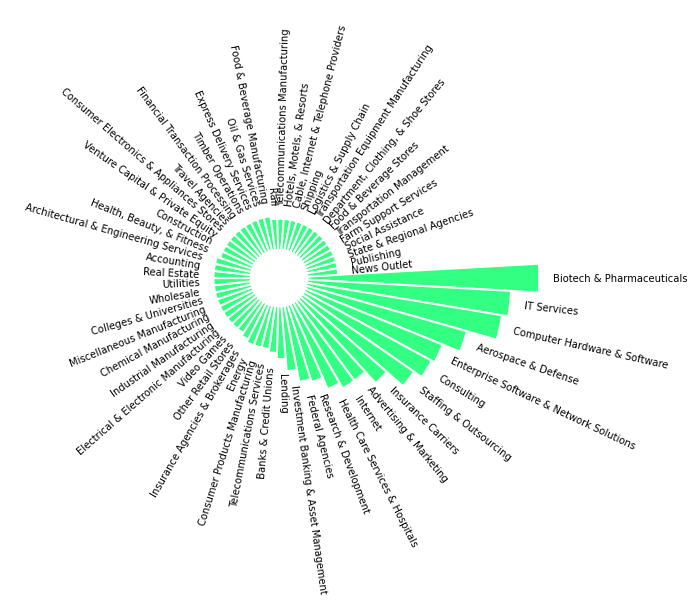

In [90]:
# Create circle bar for job posting count for each industry
# https://www.python-graph-gallery.com/circular-barplot-basic

plt.figure(figsize=(25,10))
ax = plt.subplot(111, polar=True)
plt.axis('off')

# Constants = parameters controling the plot layout:
upperLimit = 66
lowerLimit = 8
labelPadding = 4

# Compute max and min in the dataset
max = inds.Postings.max()

# Let's compute heights: they are a conversion of each item value in those new coordinates
# In our example, 0 in the dataset will be converted to the lowerLimit (10)
# The maximum will be converted to the upperLimit (100)
slope = (max - lowerLimit) / max
heights = slope * inds.Postings + lowerLimit

# Compute the width of each bar. In total we have 2*Pi = 360°
width = 2*np.pi / len(inds.index)

# Compute the angle each bar is centered on:
indexes = list(range(1, len(inds.index)+1))
angles = [element * width for element in indexes][::-1]
angles

# Draw bars
bars = ax.bar(
    x=angles, 
    height=heights, 
    width=width, 
    bottom=lowerLimit,
    linewidth=2, 
    edgecolor="white",
    color="#33FF82",
)

# Add labels
for bar, angle, height, label in zip(bars,angles, heights, inds["Industry"]):

    # Labels are rotated. Rotation must be specified in degrees :(
    rotation = np.rad2deg(angle)

    # Flip some labels upside down
    alignment = ""
    if angle >= np.pi/2 and angle < 3*np.pi/2:
        alignment = "right"
        rotation = rotation + 180
    else: 
        alignment = "left"

    # Finally add the labels
    ax.text(
        x=angle, 
        y=lowerLimit + bar.get_height() + labelPadding, 
        s=label, 
        ha=alignment, 
        va='center', 
        rotation=rotation, 
        rotation_mode="anchor") 
    
plt.savefig('images/industries.svg')

In [127]:
# count of desired skill
skillscount = pd.DataFrame(df2.sum(axis=0)[7:])
sc = skillscount.reset_index()
sc.columns=['Skill', 'Postings']
sc = sc.sort_values('Postings', ascending=False)
sc

,Skill,Postings
0,python,424
1,excel,260
3,spark,161
4,aws,144
2,hadoop,125
6,big_data,123
5,tableau,112


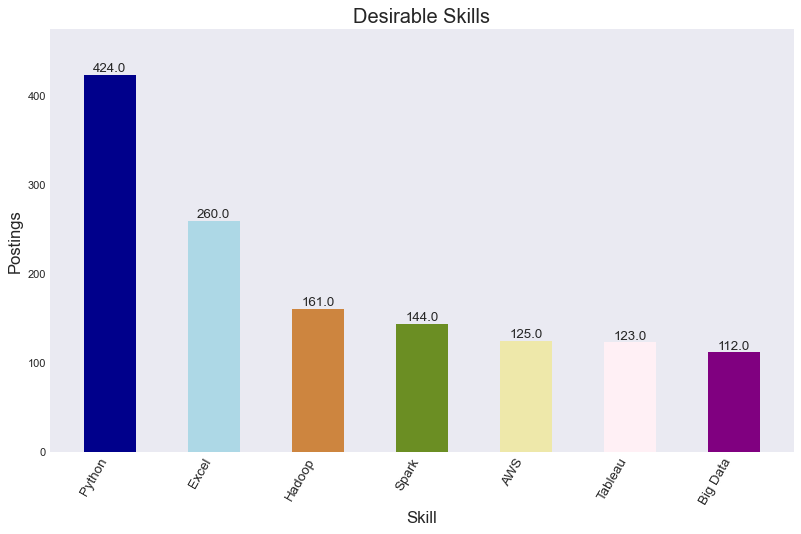

In [154]:
# Create bar chart for skills
# https://www.machinelearningplus.com/plots/top-50-matplotlib-visualizations-the-master-plots-python/

#plt.style.use('seaborn-muted')
all_colors = list(plt.cm.colors.cnames.keys())
random.seed(100)
c = random.choices(all_colors, k=7)

# Plot Bars
plt.figure(figsize=(12,7), dpi= 80)
plt.bar(sc.Skill, sc.Postings, color=c, width=.5)
for i, val in enumerate(sc.Postings.values):
    plt.text(i, val, float(val), horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':400, 'size':12})

ticksrenamed = ['Python', 'Excel', 'Hadoop', 'Spark', 'AWS', 'Tableau', 'Big Data']

# Decoration
plt.gca().set_xticklabels(ticksrenamed, rotation=60, horizontalalignment= 'right', fontsize=12)
plt.title("Desirable Skills", fontsize=18)
plt.ylabel('Postings', fontsize=15)
plt.xlabel('Skill', fontsize=15)
plt.ylim(0, 475)
plt.savefig('images/skills.svg')

In [ ]:
HL will continue